# 개선 방안

## 신경망의 개선 방안을 찾아봅니다.
**이전에 꽤나 높은 퍼포먼스를 확인했으나 개선의 여지가 있을 수도 있습니다.**
  ### 1. 학습률 변경
  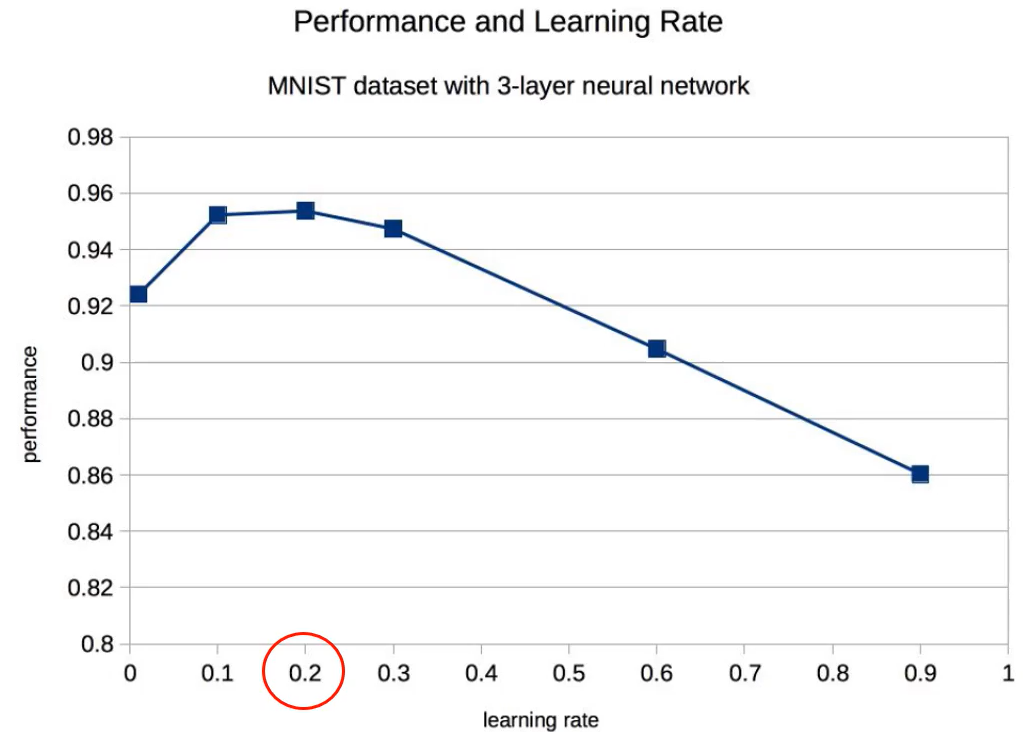

In [1]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
activ_fct = lambda x: expit(x)
%matplotlib inline

In [2]:
# 신경망 클래스 정의
class neuralNetwork:

    # 신경망 초기화
    def __init__(self, inodes, hnodes, onodes, lr):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        # NNlab1에서는 333, 222를 다뤘지만 각 계층의 노드 수가 다를 수도 있음
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes

        # 가중치 행렬, 행렬은 대문자로 표기
        # 배열 내 가중치는 w_ij로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨
        self.W_ih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.W_ho = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # 학습률
        self.lr = lr

        # 활성화 함수로는 시그모이드 함수를 이용
        self.activ_fct = lambda x: expit(x)
        pass

    # 신경망 학습시키기
    def train(self, input_list, target_list):
        # 리스트(1 x n) -> 넘파이 행렬(n x 1)
        I_i = np.array(input_list, ndmin=2).T
        T_o = np.array(target_list, ndmin=2).T

        # 은닉 계층으로 들어오는 신호
        I_h = np.dot(self.W_ih, I_i) # (주의)입력 계층에서는 I를 사용
        # 은닉 계층에서 나가는 신호
        O_h = self.activ_fct(I_h)

        # 출력 계층으로 들어오는 신호
        I_o = np.dot(self.W_ho, O_h) # 그 외 계층에서는 O를 사용
        # 출력 계층에서 나가는 신호
        O_o = self.activ_fct(I_o)

        # 출력 계층의 오차는 (실제 값 - 계산 값)
        E_o = T_o - O_o
        # 은닉 계층의 오차는
        E_h = np.dot(self.W_ho.T, E_o)

        # 은닉 계층과 출력 계층 간의 가중치 업데이트 (W = W - lr * dE/dW, dE/dW = - (t - o) * ...)
        self.W_ho += self.lr * np.dot(E_o * O_o * (1.0 - O_o), O_h.T)

        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.W_ih += self.lr * np.dot(E_h * O_h * (1 - O_h), I_i.T)
        pass

    # 신경망에 질의하기
    def query(self, input_list):
        # 리스트(1 x n) -> 넘파이 행렬(n x 1)
        I_i = np.array(input_list, ndmin=2).T

        # 은닉 계층으로 들어오는 신호
        I_h = np.dot(self.W_ih, I_i)
        # 은닉 계층에서 나가는 신호
        O_h = self.activ_fct(I_h)

        # 출력 계층으로 들어오는 신호
        I_o = np.dot(self.W_ho, O_h)
        # 출력 계층에서 나가는 신호
        O_o = self.activ_fct(I_o)

        return O_o

In [3]:
# 입력, 은닉, 출력 노드의 수
inodes = 784
hnodes = 100
onodes = 10

# 학습률은 0.2
lr = 0.2

# 신경망의 인스턴스 생성
n = neuralNetwork(inodes, hnodes, onodes, lr)

In [4]:
# mnist 학습 데이터 불러오기
train_data_file = open("../mnist_dataset/mnist_train.csv", "r")
train_data_list = train_data_file.readlines()
train_data_file.close()

len(train_data_list)

60000

In [5]:
# mnist 학습 데이터 불러오기
test_data_file = open("../mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

len(test_data_list)

10000

In [6]:
# 신경망 학습시키기

# 학습 데이터의 레코드를 순서대로 방문
for record in train_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(onodes) + 0.1
    targets[int(all_values[0])] = 0.99

    # 학습
    n.train(inputs, targets)
    pass

In [7]:
# 신경망 테스트

# 신경망 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터의 레코드를 순서대로 방문
for record in test_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 정답은 index 0의 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label): # 정답이면
        scorecard.append(1) # 성적표에 1을 추가
    else: # 오답이면
        scorecard.append(0) # 성적표에 0을 추가
        pass
    pass

lr = 0.3이었을 때의 performance
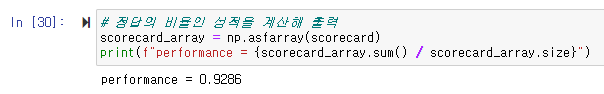

In [8]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asfarray(scorecard)
print(f"performance = {scorecard_array.sum() / scorecard_array.size}")

performance = 0.9354


  ### 2. 여러 번 수행을 통한 신경망의 개선
  epoch : 주기, 학습 데이터가 학습을 위해 사용되는 횟수를 의미
  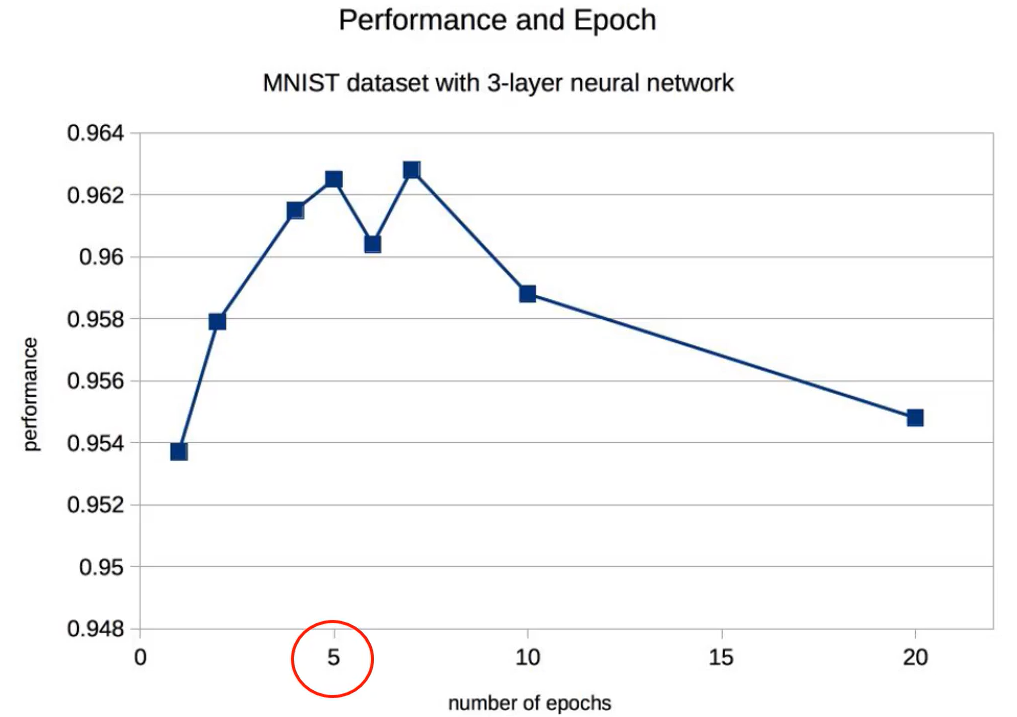

In [9]:
# 신경망 학습시키기

epochs = 5

for e in range(epochs):
    # 학습 데이터의 레코드를 순서대로 방문
    for record in train_data_list:
        # 레코드를 쉼표로 split
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(onodes) + 0.1
        targets[int(all_values[0])] = 0.99

        # 학습
        n.train(inputs, targets)
        pass
pass

In [10]:
# 신경망 테스트

# 신경망 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터의 레코드를 순서대로 방문
for record in test_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 정답은 index 0의 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label): # 정답이면
        scorecard.append(1) # 성적표에 1을 추가
    else: # 오답이면
        scorecard.append(0) # 성적표에 0을 추가
        pass
    pass

In [11]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asfarray(scorecard)
print(f"performance = {scorecard_array.sum() / scorecard_array.size}")

performance = 0.9256


  ### 3. 학습률과 주기의 다양한 조합으로 개선
  학습률에 따라 경사하강법에서 잘못된 최저점에 빠져버릴 수도 있습니다.
  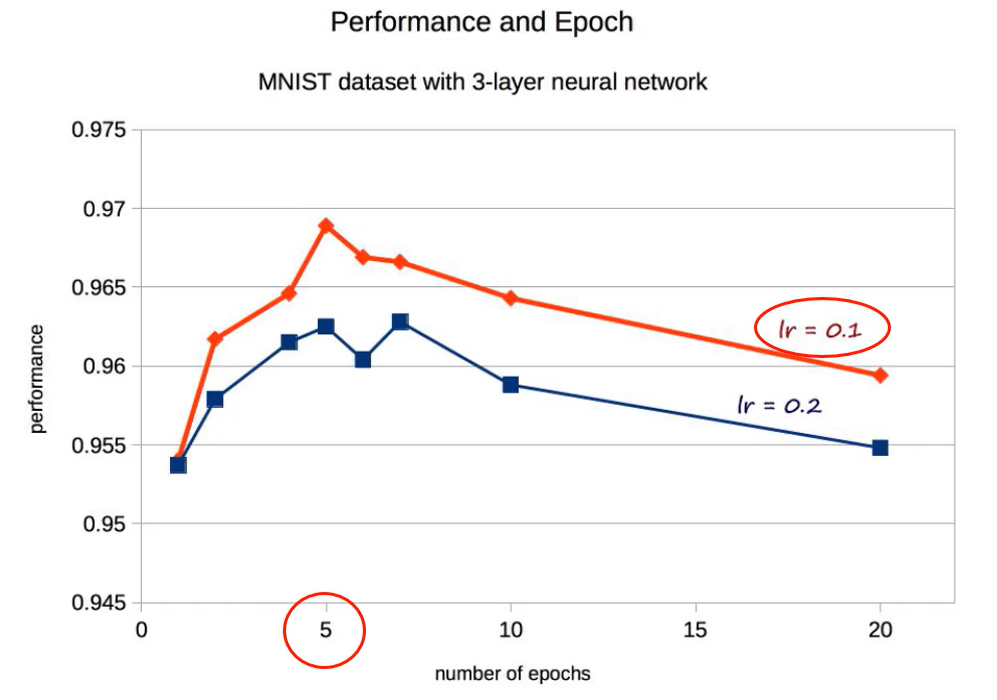

In [12]:
# 신경망 학습시키기

epochs = 5
lr = 0.1

for e in range(epochs):
    # 학습 데이터의 레코드를 순서대로 방문
    for record in train_data_list:
        # 레코드를 쉼표로 split
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(onodes) + 0.1
        targets[int(all_values[0])] = 0.99

        # 학습
        n.train(inputs, targets)
        pass
pass

In [13]:
# 신경망 테스트

# 신경망 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터의 레코드를 순서대로 방문
for record in test_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 정답은 index 0의 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label): # 정답이면
        scorecard.append(1) # 성적표에 1을 추가
    else: # 오답이면
        scorecard.append(0) # 성적표에 0을 추가
        pass
    pass

In [14]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asfarray(scorecard)
print(f"performance = {scorecard_array.sum() / scorecard_array.size}")

performance = 0.9303


  ### 4. 신경망 구조 변경(number of hidden nodes)
  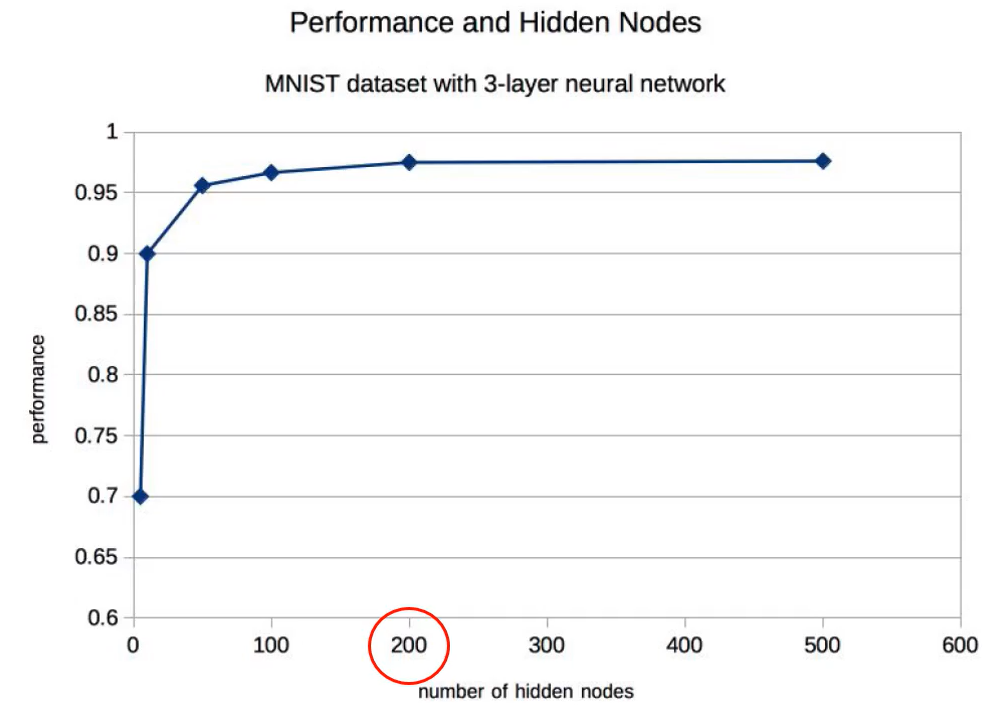